In [42]:
from urllib.request import urlretrieve
from os.path import isfile, isdir
import tarfile
from tqdm import tqdm
import zipfile


import numpy as np
import pandas as pd

import scipy.stats as stats
import sklearn
from sklearn import ensemble
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
#from sklearn.cross_validation import ShuffleSplit, train_test_split
#import sklearn.learning_curve as curves
#from sklearn.learning_curve import validation_curve
#from sklearn.cross_validation import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [43]:
urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip',
            'Bike-Sharing-Dataset.zip')
with zipfile.ZipFile("Bike-Sharing-Dataset.zip","r") as zip_ref:
    zip_ref.extractall('dataset')

In [44]:
hour_df = pd.read_csv('./dataset/hour.csv')
print("Shape of dataset::{}".format(hour_df.shape))

Shape of dataset::(17379, 17)


In [45]:
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [46]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [47]:
#renaming columns
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

In [48]:
# date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

In [49]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  category      
 6   is_holiday         17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   is_workingday      17379 non-null  category      
 9   weather_condition  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

<AxesSubplot:xlabel='datetime'>

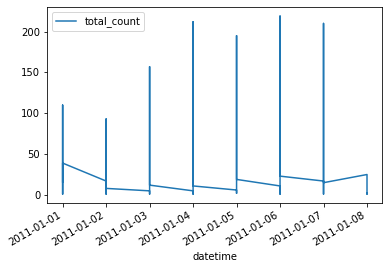

In [50]:
import matplotlib.pyplot as plt
hour_df[:24*7].plot(x='datetime', y='total_count')

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


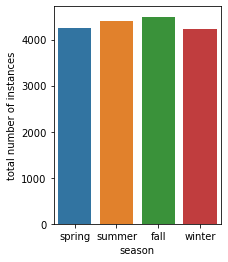

In [51]:
seasons = ['spring', 'summer', 'fall', 'winter']
# Let's check if the data is skewed / biased towards any given season

plt.figure(figsize=(3, 4))
ax = sns.countplot('season', data=hour_df)
ax.set_xticklabels(seasons)
ax.set_ylabel('total number of instances')

plt.show()

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


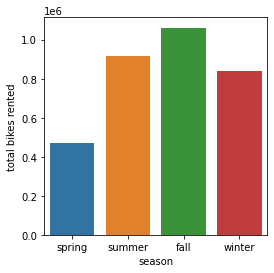

In [52]:
#demand in seasons
plt.figure(figsize=(4, 4))

ax = sns.barplot('season', 'total_count', data=hour_df, estimator=sum, ci=None)
ax.set_xticklabels(seasons)
ax.set_ylabel('total bikes rented')

plt.show()


In [53]:
hour_df.head(2)

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


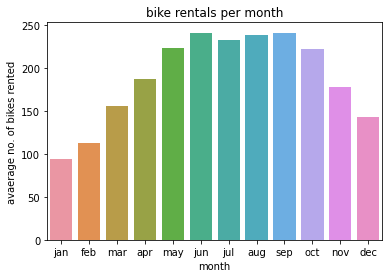

In [54]:
months = 'jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec'.split(',')
ax = sns.barplot('month', 'total_count', data=hour_df, estimator=np.mean, ci=None)
ax.set_ylabel('avaerage no. of bikes rented')
ax.set_xlabel('month')
ax.set_xticklabels(months)

plt.title('bike rentals per month')

plt.show()

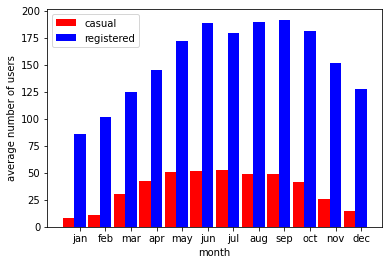

In [55]:
N = 12

y1 = hour_df.casual.groupby(hour_df.month).mean().tolist()

x = np.arange(N)
width = 0.45   # bar width

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(x, y1, width, color='r')

y2 = hour_df.registered.groupby(hour_df.month).mean().tolist()
rects2 = ax.bar(x+width, y2, width, color='b')

ax.set_ylabel('average number of users')
ax.set_xticks(x+width)
ax.set_xticklabels(months)
ax.set_xlabel('month')
ax.legend( (rects1[0], rects2[0]), ('casual', 'registered') )

plt.show()

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


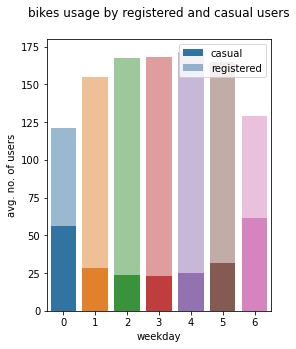

In [56]:
plt.figure(figsize=(4, 5))

ax1 = sns.barplot('weekday', 'casual', data=hour_df, estimator=np.mean, label='casual', ci=None)
ax2 = sns.barplot('weekday', 'registered', data=hour_df, estimator=np.mean, alpha=.5, label='registered', ci=None)

plt.title('bikes usage by registered and casual users', y=1.06)
plt.ylabel('avg. no. of users')
plt.legend(loc='best')

# ax2.set_xticklabels()
plt.show()

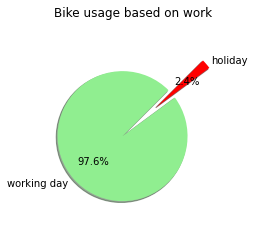

In [57]:
plt.figure(figsize=(3, 4))

labels = 'working day', 'holiday'
sizes = hour_df.total_count.groupby(hour_df.is_holiday).sum().tolist()
colors = ['lightgreen', 'red']
explode = (0.4, 0.3)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=45)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Bike usage based on work')
plt.show()


/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


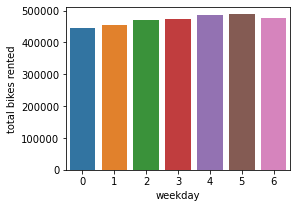

In [58]:
plt.figure(figsize=(4, 3))
ax = sns.barplot('weekday', 'total_count', data=hour_df, estimator=sum, ci=None)

ax.set_ylabel('total bikes rented')
ax.set_xlabel('weekday')

plt.show()

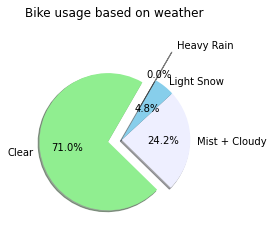

In [59]:
plt.figure(figsize=(3, 4))

labels = 'Clear', 'Mist + Cloudy', 'Light Snow', 'Heavy Rain'
sizes = hour_df.total_count.groupby(hour_df.weather_condition).sum().tolist()
colors = ['lightgreen', '#eeefff', 'skyblue', 'black']
explode = (0.2, 0, 0, 0.5)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=60)
plt.axis('equal')
plt.title('Bike usage based on weather')
plt.show()

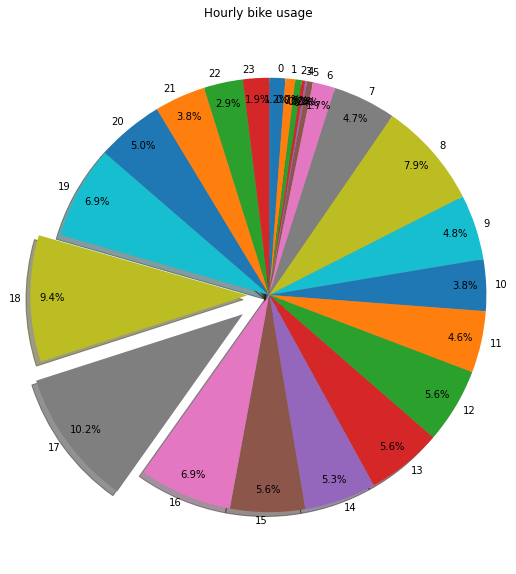

In [60]:
plt.figure(figsize=(9, 10))

labels = list(range(24))
sizes = hour_df.total_count.groupby(hour_df.hour).sum().tolist()
# colors = ['gold', '#eeefff', 'white', 'black']
explode = np.zeros(24)
explode[17] = 0.15
explode[18] = 0.1

plt.pie(sizes, labels=labels, shadow=True, startangle=90, pctdistance=.9, explode=explode,
        autopct='%1.1f%%',  counterclock=False, labeldistance=1.04)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Hourly bike usage')
plt.show()

In [61]:
hour_df = hour_df.drop(['rec_id','datetime','casual','registered'],axis=1)

In [62]:
target = hour_df.total_count
features = hour_df.drop(['total_count'],axis=1)

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaled_features = MinMaxScaler().fit_transform(features)

TypeError: got an unexpected keyword argument 'linewidth'

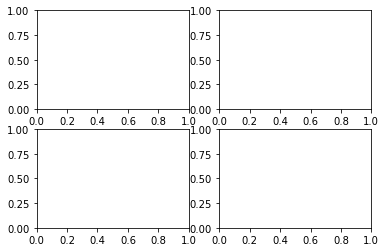

In [64]:
hour_df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].boxplot(x="temp",data=hour_df,linewidth=2,color='#b49fb5')
axes[0,0].set_title("Variation of temp")
axes[0,1].boxplot(x="atemp",data=hour_df,linewidth=2,color='#8ab0d9')
axes[0,1].set_title("Variation of atemp")
axes[1,0].boxplot(x="windspeed",data=hour_df,linewidth=2,color='#8ab0d9')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].boxplot(x="humidity",data=hour_df,linewidth=2,color='#b49fb5')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

In [ ]:
hour_df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=hour_df,edgecolor="black",linewidth=2,color='#b49fb5')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=hour_df,edgecolor="black",linewidth=2,color='#8ab0d9')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=hour_df,edgecolor="black",linewidth=2,color='#8ab0d9')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=hour_df,edgecolor="black",linewidth=2,color='#b49fb5')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

KeyError: 'count'

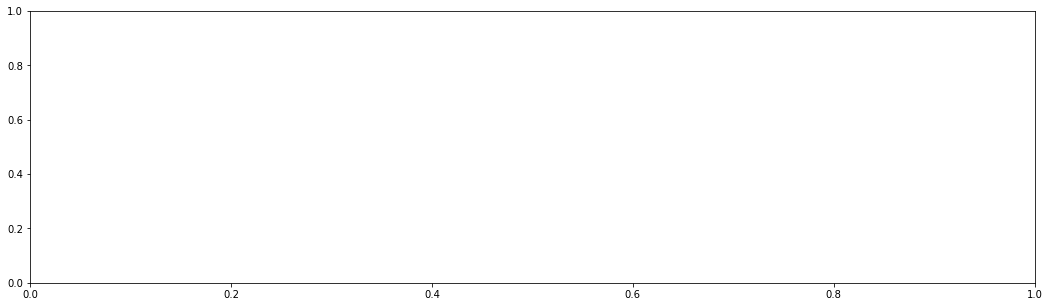

In [65]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=hour_df["hour"], y=hour_df["count"], hue=hour_df["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Normal Weather Count', title="Normal Weather By Hour Of The Day Across Season");

In [66]:
season = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
good_weather = hour_df[hour_df['weather_condition'] == 1][['hour', 'season']].copy()
hour_df = pd.DataFrame({'count' : good_weather.groupby(["hour","season"]).size()}).reset_index()
hour_df['season'] = ['season'].map(lambda d : season_map[d])

fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=hour_df["hour"], y=hour_df["count"], hue=hour_df["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Good Weather Count', title="Good Weather By Hour Of The Day Across Season");

AttributeError: 'list' object has no attribute 'map'